#K-means Classification of Raw Field Data at 10 nm wavelength


**The code constructs K_means clustering algorithm to processes the field reflectance data.The code interpolates the 1nm reflectance to 10nm, and construct k_means model for field data**


In [1]:

##we are importing operational packages

import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/gdrive')

##we are importing visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

# Important tools for modeling and evaluation.
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

Mounted at /content/gdrive


***We want to load the excel book and call each worksheet.
This saves us time from saving each worksheet seperately as a .csv file***

In [2]:
ZachA_LynnW = pd.ExcelFile('/content/gdrive/MyDrive/Field_Reflectance_Preprocessed/042623_HWHF_10d_1_1.xlsx')
ZachA_15_Weeds = pd.read_excel(ZachA_LynnW, 'ZachA_15_Weeds')
ZachA_15_Soil = pd.read_excel(ZachA_LynnW, 'ZachA15_Soil')
ZachA_14_Weeds = pd.read_excel(ZachA_LynnW, 'ZachA_14_Weeds')
ZachA_14_Soil = pd.read_excel(ZachA_LynnW, 'ZachA14_Soil')
ZachA_13_Weeds = pd.read_excel(ZachA_LynnW, 'ZachA13_Weeds')
ZachA_13_Soil = pd.read_excel(ZachA_LynnW, 'ZachA13_10D_Soil')
ZachA_12_Wheat = pd.read_excel(ZachA_LynnW, 'ZachA12_Wheat')
ZachA_12_Road = pd.read_excel(ZachA_LynnW, 'ZachA12_Road')
ZachA_11_Wheat = pd.read_excel(ZachA_LynnW, 'ZackA_11_Wheat')
ZachA_11_Soil = pd.read_excel(ZachA_LynnW, 'ZachA11_Soil')
LynnW05_CornRes = pd.read_excel(ZachA_LynnW, '042623_LynnW05_Cornres')
LynnW05_Soil = pd.read_excel(ZachA_LynnW, '042623_LynnW05_Bare_Soil')
LynnW04_CornRes = pd.read_excel(ZachA_LynnW, '042623_LynnW04_Cornres')
LynnW04_Soil = pd.read_excel(ZachA_LynnW, '042623LynnW04_Bare_SOil')
LynnW03_CornRes = pd.read_excel(ZachA_LynnW, '042623_LynnW03_Cornres')
LynnW03_Soil = pd.read_excel(ZachA_LynnW, '042623LynnW_03_Bare_Soil')
LynnW02_CornRes = pd.read_excel(ZachA_LynnW, '042623_LynnW02_Cornres')
LynnW02_Soil = pd.read_excel(ZachA_LynnW, '042623_LynnW02_Bare_Soil')
LynnW01_CornRes = pd.read_excel(ZachA_LynnW, '042623_LynnW01_Cornres')
LynnW01_Soil = pd.read_excel(ZachA_LynnW, '042623_LynnW01_Bare_Soil')

SK_farms = pd.ExcelFile('/content/gdrive/MyDrive/Field_Reflectance_Preprocessed/052423_HWHF_10d_1.xlsx')
SK_5_Soil = pd.read_excel(SK_farms, '052423_SK_5_Soil')
SK_5_Grass = pd.read_excel(SK_farms, '052423_SK_5_Grass')
SK_4_Soil = pd.read_excel(SK_farms, '052423_SK_4_Soil')
SK_4_Grass = pd.read_excel(SK_farms, '052423_SK_4_Grass')
SK_3_Soil = pd.read_excel(SK_farms, '052423_SK_3_Soil')
SK_3_Grass = pd.read_excel(SK_farms, '052423_SK_3_Grass')
SK_2_Soil = pd.read_excel(SK_farms, '052423_SK_2_Soil')
SK_2_Grass = pd.read_excel(SK_farms, '052423_SK_2_Grass')
SK_1_Soil = pd.read_excel(SK_farms, '052423_SK_1_Soil')
SK_1_Grass = pd.read_excel(SK_farms, '052423_SK_1_Grass')

KB_farms = pd.ExcelFile('/content/gdrive/MyDrive/Field_Reflectance_Preprocessed/052223_HWHF_10d_1.xlsx')
KB_5_Wheat = pd.read_excel(KB_farms, '52223_KB5_Wheat')
KB_5_Soil = pd.read_excel(KB_farms, '052223_KB5_Soil')
KB_5_Drying_Wheat = pd.read_excel(KB_farms, '052223_KB5_Drying_Wheat')
KB_5_Corn_Res = pd.read_excel(KB_farms, '052223_KB5_Corn_Res')
KB_4_Soil = pd.read_excel(KB_farms, '052223_KB4_Soil')
KB_4_Dry_Rye = pd.read_excel(KB_farms, '052223_KB4_Dry_Rye')
KB_4_Corn_Res = pd.read_excel(KB_farms, '052223_KB4_Corn_Res')
KB_3_Soil = pd.read_excel(KB_farms, '052223_KB3_Soil')
KB_3_Corn_Res = pd.read_excel(KB_farms, '052223_KB_3_Corn_Res')
KB_1_Soil = pd.read_excel(KB_farms, '052223_KB1_Soil')
KB_1_Corn_Res = pd.read_excel(KB_farms, '052223_KB1_Corn_Res')
JB_5_Soil = pd.read_excel(KB_farms, '052223_JB5_Soil')
JB_5_Corn_Res = pd.read_excel(KB_farms, '052223_JB5_Corn_Res')
JB_4_Soil = pd.read_excel(KB_farms, '052223_JB4_Soil')
JB_4_Corn_Res = pd.read_excel(KB_farms, '052223_JB4_CorenRes')
JB_3_Soil = pd.read_excel(KB_farms, '052223_JB3_Soil')
JB_3_Corn_Res = pd.read_excel(KB_farms, '052223_JB3_Corn_Residue')
JB_2_Soil = pd.read_excel(KB_farms, '052223_JB2_Soil')
JB_2_Corn_Res = pd.read_excel(KB_farms, '052223_JB2_Corn_Residue')
JB_1_Soil = pd.read_excel(KB_farms, '052223_JB1_Soil')
JB_1_Corn_Res = pd.read_excel(KB_farms, '052223_JB1_CornRes')
JB_1_Soya_Bean = pd.read_excel(KB_farms, '052223_JB1_Soya_Bean')
JB_Grass_Filt = pd.read_excel(KB_farms, '052223_JB_Grass_Filt')
JB_0_Road = pd.read_excel(KB_farms, '052223_JB0_Road')

JanD_farms = pd.ExcelFile('/content/gdrive/MyDrive/Field_Reflectance_Preprocessed/041923_HWHF_10d_1_1.xlsx')
JanD_S10_Weeds = pd.read_excel(JanD_farms, '041923_JanDS10_Weeds')
JanD_S9_Weeds = pd.read_excel(JanD_farms, '041923_JanDS09_Weeds')
JanD_S9_Corn_Res = pd.read_excel(JanD_farms, '041923_JanDS09_Cornres')
JanD_S8_Corn_Res = pd.read_excel(JanD_farms, '041923_JanDS08_Cornres')
JanD_S8_Bare_Soil = pd.read_excel(JanD_farms, '041923JanDS08_Baresoil')
JanD_S6_Weed = pd.read_excel(JanD_farms, '041923_JanDS06_Weed')
JanD_S6_Weed_2 = pd.read_excel(JanD_farms, '041923_JanDS06_Weed2')
JanD_S6_Weed_3 = pd.read_excel(JanD_farms, '041923_JanDS06_Weed3')
JanD_S6_Bare_Soil = pd.read_excel(JanD_farms, '041923_JanDS06_Baresoil')
JanD_S6_Corn_Redw = pd.read_excel(JanD_farms, '041923JanDS06_Corn_Redw')



***This function calculates the mean avaerage reflectance of the sample and multiplies it by 100***

In [3]:
def mean_reflectance (sample):
  sample["Mean Reflectance"] = sample.drop('Wavelength', axis=1).mean(axis=1)*100
  return sample["Mean Reflectance"]

***This function performs the interpolation at 10nm and calculates the derivative spectra***

In [4]:

def ten_nm(sample):

  ## we convert the mean reflectance and wavelength at 1nm  to numpy arrays
  Wavelength_np = np.array(sample["Wavelength"])

  #we apply the mean_reflectance function on the sample and convert it to numpy arrays
  Reflectance_np= np.array( mean_reflectance (sample))

  ##we tell python to give us values from 350 t0 2500, in intervals of 10
  xvals = np.array(range(350, 2481, 10))

  ##we are performing the interpolation at 10nm using the intervals, wavelength, and reflecatnace
  interp_10nm = np.interp(xvals,Wavelength_np, Reflectance_np)


  return interp_10nm

***we want to execute the ten_nm function on each sample
to get the 10nm  spectra of each sample***

In [5]:

SK_5_Soil_ten_nm = ten_nm(SK_5_Soil)
SK_5_Grass_ten_nm = ten_nm(SK_5_Grass)
SK_4_Soil_ten_nm = ten_nm(SK_4_Soil)
SK_4_Grass_ten_nm = ten_nm( SK_4_Grass)
SK_3_Soil_ten_nm = ten_nm(SK_3_Soil)
SK_3_Grass_ten_nm = ten_nm(SK_3_Grass)
SK_2_Soil_ten_nm = ten_nm(SK_2_Soil)
SK_2_Grass_ten_nm = ten_nm(SK_2_Grass)
SK_1_Soil_ten_nm = ten_nm(SK_1_Soil)
SK_1_Grass_ten_nm = ten_nm(SK_1_Grass)

KB_5_Soil_ten_nm = ten_nm (KB_5_Soil)
KB_5_Wheat_ten_nm = ten_nm(KB_5_Wheat)
KB_5_Drying_Wheat_ten_nm = ten_nm(KB_5_Drying_Wheat)
KB_5_Corn_Res_ten_nm = ten_nm(KB_5_Corn_Res)
KB_4_Dry_Rye_ten_nm = ten_nm (KB_4_Dry_Rye)
KB_4_Soil_ten_nm = ten_nm (KB_4_Soil)
KB_3_Corn_Res_ten_nm = ten_nm (KB_3_Corn_Res)
KB_3_Soil_ten_nm = ten_nm (KB_3_Soil)
KB_1_Corn_Res_ten_nm = ten_nm (KB_1_Corn_Res)
KB_1_Soil_ten_nm = ten_nm (KB_1_Soil)

JB_5_Soil_ten_nm = ten_nm(JB_5_Soil)
JB_5_Corn_Res_ten_nm = ten_nm(JB_5_Corn_Res)
JB_4_Soil_ten_nm = ten_nm (JB_4_Soil)
JB_4_Corn_Res_ten_nm = ten_nm (JB_4_Corn_Res)
JB_3_Soil_ten_nm = ten_nm (JB_3_Soil)
JB_3_Corn_Res_ten_nm = ten_nm (JB_3_Corn_Res)
JB_2_Soil_ten_nm = ten_nm (JB_2_Soil)
JB_2_Corn_Res_ten_nm = ten_nm (JB_2_Corn_Res)
JB_1_Soil_ten_nm = ten_nm (JB_1_Soil)
JB_1_Corn_Res_ten_nm = ten_nm (JB_1_Corn_Res)
JB_1_Soya_Bean_ten_nm = ten_nm (JB_1_Soya_Bean)
JB_0_Road_ten_nm = ten_nm (JB_0_Road)
JB_Grass_Filt_ten_nm = ten_nm (JB_Grass_Filt)

JanD_S10_Weeds_ten_nm = ten_nm(JanD_S10_Weeds)
JanD_S9_Weeds_ten_nm = ten_nm(JanD_S9_Weeds)
JanD_S9_Corn_Res_ten_nm = ten_nm(JanD_S9_Corn_Res)

JanD_S8_Corn_Res_ten_nm = ten_nm (JanD_S8_Corn_Res)
JanD_S8_Bare_Soil_ten_nm = ten_nm (JanD_S8_Bare_Soil)
JanD_S6_Weed_ten_nm = ten_nm (JanD_S6_Weed)
JanD_S6_Weed_2_ten_nm = ten_nm (JanD_S6_Weed_2)
JanD_S6_Weed_3_ten_nm = ten_nm (JanD_S6_Weed_3)
JanD_S6_Corn_Rewd_ten_nm = ten_nm (JanD_S6_Corn_Redw )

ZachA_15_Weeds_ten_nm = ten_nm(ZachA_15_Weeds)
ZachA_15_Soil_ten_nm = ten_nm(ZachA_15_Soil)
ZachA_14_Soil_ten_nm = ten_nm(ZachA_14_Soil)
ZachA_14_Weeds_ten_nm = ten_nm(ZachA_14_Weeds)
ZachA_13_Weeds_ten_nm = ten_nm(ZachA_13_Weeds)
ZachA_13_Soil_ten_nm = ten_nm(ZachA_13_Soil)
ZachA_12_Wheat_ten_nm = ten_nm (ZachA_12_Wheat)
ZachA_12_Road_ten_nm = ten_nm (ZachA_12_Road)
ZachA_11_Wheat_ten_nm = ten_nm(ZachA_11_Wheat)
ZachA_11_Soil_ten_nm = ten_nm(ZachA_11_Soil)


LynnW_05_CornRes_ten_nm = ten_nm(LynnW05_CornRes)
LynnW_05_Soil_ten_nm = ten_nm(LynnW05_Soil)
LynnW_04_CornRes_ten_nm = ten_nm (LynnW04_CornRes)
LynnW_04_Soil_ten_nm = ten_nm(LynnW04_Soil)
LynnW_03_CornRes_ten_nm = ten_nm(LynnW03_CornRes)
LynnW_03_Soil_ten_nm = ten_nm (LynnW03_Soil)
LynnW_02_CornRes_ten_nm = ten_nm (LynnW02_CornRes)
LynnW_02_Soil_ten_nm = ten_nm(LynnW02_Soil)
LynnW_01_CornRes_ten_nm = ten_nm(LynnW01_CornRes)
LynnW_01_Soil_ten_nm = ten_nm (LynnW01_Soil)



***We want to make a dataframe of all 10nm reflectance of each sample from each site***

In [6]:

xvals_10nm = np.array(range(350, 2481, 10))
ten_nm_spring_2023 = pd.DataFrame({'Wavelength':xvals_10nm,
                                       'ZachA_15_Weeds_ten_nm': ZachA_15_Weeds_ten_nm,
                                       'ZachA_15_Soil_ten_nm': ZachA_15_Soil_ten_nm,
                                       'ZachA_14_Weeds_ten_nm': ZachA_14_Weeds_ten_nm,
                                       'ZachA_14_Soil_ten_nm':ZachA_14_Soil_ten_nm,
                                       'ZachA_13_Weeds_ten_nm':ZachA_13_Weeds_ten_nm,
                                       'ZachA_13_Soil_ten_nm': ZachA_13_Soil_ten_nm,
                                       'ZachA_12_Wheat_ten_nm ':ZachA_12_Wheat_ten_nm ,
                                       'ZachA_12_Road_ten_nm': ZachA_12_Road_ten_nm,
                                       'ZachA_11_Wheat_ten_nm':ZachA_11_Wheat_ten_nm,
                                       'ZachA_11_Soil_ten_nm': ZachA_11_Soil_ten_nm,
                                       'LynnW_05_CornRes_ten_nm': LynnW_05_CornRes_ten_nm,
                                       'LynnW_05_Soil_ten_nm': LynnW_05_Soil_ten_nm,
                                       'LynnW_04_CornRes_ten_nm ': LynnW_04_CornRes_ten_nm,
                                       'LynnW_04_Soil_ten_nm ': LynnW_04_Soil_ten_nm,
                                       'LynnW_03_CornRes_ten_nm ': LynnW_03_CornRes_ten_nm,
                                       'LynnW_03_Soil_ten_nm':LynnW_03_Soil_ten_nm,
                                       'LynnW_02_CornRes_ten_nm ': LynnW_02_CornRes_ten_nm,
                                       'LynnW_02_Soil_ten_nm':LynnW_02_Soil_ten_nm,
                                       'LynnW_01_CornRes_ten_nm ': LynnW_01_CornRes_ten_nm,
                                       'LynnW_01_Soil_ten_nm': LynnW_01_Soil_ten_nm,
                                       'SK_5_Soil_ten_nm': SK_5_Soil_ten_nm,
                                       'SK_5_Grass_ten_nm': SK_5_Grass_ten_nm,
                                       'SK_4_Soil_ten_nm ': SK_4_Soil_ten_nm,
                                       'SK_4_Grass_ten_nm': SK_4_Grass_ten_nm,
                                       'SK_3_Soil_ten_nm' : SK_3_Soil_ten_nm,
                                       'SK_3_Grass_ten_nm': SK_3_Grass_ten_nm,
                                       'SK_2_Soil_ten_nm': SK_2_Soil_ten_nm,
                                       'SK_2_Grass_ten_nm': SK_2_Grass_ten_nm,
                                       'SK_1_Soil_ten_nm ':SK_1_Soil_ten_nm,
                                       'SK_1_Grass_ten_nm': SK_1_Grass_ten_nm,
                                       'KB_5_Soil_ten_nm':  KB_5_Soil_ten_nm,
                                       'KB_5_Wheat_ten_nm': KB_5_Wheat_ten_nm,
                                       'KB_5_Drying_Wheat_ten_nm': KB_5_Drying_Wheat_ten_nm,
                                       'KB_5_Corn_Res_ten_nm ': KB_5_Corn_Res_ten_nm,
                                       'KB_4_Dry_Rye_ten_nm': KB_4_Dry_Rye_ten_nm,
                                       'KB_4_Soil_ten_nm': KB_4_Soil_ten_nm,
                                       'KB_3_Corn_Res_ten_nm ': KB_3_Corn_Res_ten_nm,
                                       'KB_3_Soil_ten_nm': KB_3_Soil_ten_nm,
                                       'KB_1_Corn_Res_ten_nm' : KB_1_Corn_Res_ten_nm,
                                       'KB_1_Soil_ten_nm': KB_1_Soil_ten_nm,
                                       'JB_5_Soil_ten_nm': JB_5_Soil_ten_nm,
                                       'JB_5_Corn_Res_ten_nm': JB_5_Corn_Res_ten_nm,
                                       'JB_4_Soil_ten_nm': JB_4_Soil_ten_nm,
                                       'JB_4_Corn_Res_ten_nm': JB_4_Corn_Res_ten_nm,
                                       'JB_3_Soil_ten_nm': JB_3_Soil_ten_nm,
                                       'JB_3_Corn_Res_ten_nm': JB_3_Corn_Res_ten_nm,
                                       'JB_2_Soil_ten_nm': JB_2_Soil_ten_nm,
                                       'JB_2_Corn_Res_ten_nm': JB_2_Corn_Res_ten_nm,
                                       'JB_1_Soil_ten_nm': JB_1_Soil_ten_nm,
                                       'JB_1_Corn_Res_ten_nm': JB_1_Corn_Res_ten_nm,
                                       'JB_1_Soya_Bean_ten_nm': JB_1_Soya_Bean_ten_nm,
                                       'JB_0_Road_ten_nm': JB_0_Road_ten_nm,
                                       'JB_Grass_Filt_ten_nm': JB_Grass_Filt_ten_nm,
                                       'JanD_S10_Weeds_ten_nm': JanD_S10_Weeds_ten_nm,
                                       'JanD_S9_Weeds_ten_nm': JanD_S9_Weeds_ten_nm,
                                       'JanD_S9_Corn_Res_ten_nm': JanD_S9_Corn_Res_ten_nm,
                                       'JanD_S8_Corn_Res_ten_nm': JanD_S8_Corn_Res_ten_nm,
                                       'JanD_S8_Bare_Soil_ten_nm': JanD_S8_Bare_Soil_ten_nm,
                                       'JanD_S6_Weed_ten_nm': JanD_S6_Weed_ten_nm,
                                       'JanD_S6_Weed_2_ten_nm ': JanD_S6_Weed_2_ten_nm,
                                       'JanD_S6_Weed_3_ten_nm ': JanD_S6_Weed_3_ten_nm,
                                       'JanD_S6_Corn_Rewd_ten_nm': JanD_S6_Corn_Rewd_ten_nm
                                       } )

***We want to plot the 10nm spectra***

Text(0.5, 0, 'Wavelength (nm)')

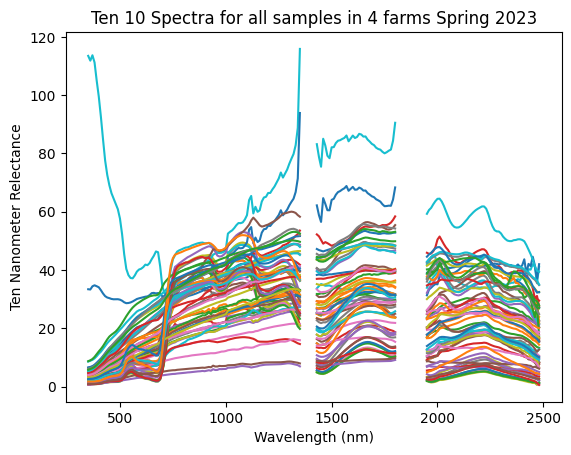

In [7]:

ten_nm_spring_2023.plot(x="Wavelength", y=['ZachA_15_Weeds_ten_nm',
                                        'ZachA_15_Weeds_ten_nm',
                                       'ZachA_15_Soil_ten_nm',
                                       'ZachA_14_Weeds_ten_nm',
                                       'ZachA_14_Soil_ten_nm',
                                       'ZachA_13_Weeds_ten_nm',
                                       'ZachA_13_Soil_ten_nm',
                                       'ZachA_12_Wheat_ten_nm ',
                                       'ZachA_12_Road_ten_nm',
                                       'ZachA_11_Wheat_ten_nm',
                                       'ZachA_11_Soil_ten_nm',
                                       'LynnW_05_CornRes_ten_nm',
                                       'LynnW_05_Soil_ten_nm',
                                       'LynnW_04_CornRes_ten_nm ' ,
                                       'LynnW_04_Soil_ten_nm ',
                                       'LynnW_03_CornRes_ten_nm ',
                                       'LynnW_03_Soil_ten_nm',
                                       'LynnW_02_CornRes_ten_nm ',
                                       'LynnW_02_Soil_ten_nm',
                                       'LynnW_01_CornRes_ten_nm ',
                                       'LynnW_01_Soil_ten_nm',
                                       'SK_5_Soil_ten_nm',
                                       'SK_5_Grass_ten_nm',
                                       'SK_4_Soil_ten_nm ',
                                       'SK_4_Grass_ten_nm',
                                       'SK_3_Soil_ten_nm' ,
                                       'SK_3_Grass_ten_nm',
                                       'SK_2_Soil_ten_nm',
                                       'SK_2_Grass_ten_nm',
                                       'SK_1_Soil_ten_nm ',
                                       'SK_1_Grass_ten_nm',
                                       'KB_5_Soil_ten_nm',
                                       'KB_5_Wheat_ten_nm',
                                       'KB_5_Drying_Wheat_ten_nm',
                                       'KB_5_Corn_Res_ten_nm ',
                                       'KB_4_Dry_Rye_ten_nm',
                                       'KB_4_Soil_ten_nm',
                                       'KB_3_Corn_Res_ten_nm ',
                                       'KB_3_Soil_ten_nm',
                                       'KB_1_Corn_Res_ten_nm',
                                       'KB_1_Soil_ten_nm',
                                       'JB_5_Soil_ten_nm',
                                       'JB_5_Corn_Res_ten_nm',
                                       'JB_4_Soil_ten_nm',
                                       'JB_4_Corn_Res_ten_nm',
                                       'JB_3_Soil_ten_nm',
                                       'JB_3_Corn_Res_ten_nm',
                                       'JB_2_Soil_ten_nm',
                                       'JB_2_Corn_Res_ten_nm',
                                       'JB_1_Soil_ten_nm',
                                       'JB_1_Corn_Res_ten_nm',
                                       'JB_1_Soya_Bean_ten_nm',
                                       'JB_0_Road_ten_nm',
                                       'JB_Grass_Filt_ten_nm',
                                       'JanD_S10_Weeds_ten_nm',
                                       'JanD_S9_Weeds_ten_nm',
                                       'JanD_S9_Corn_Res_ten_nm',
                                       'JanD_S8_Corn_Res_ten_nm',
                                       'JanD_S8_Bare_Soil_ten_nm',
                                       'JanD_S6_Weed_ten_nm',
                                       'JanD_S6_Weed_2_ten_nm ',
                                       'JanD_S6_Weed_3_ten_nm ',
                                       'JanD_S6_Corn_Rewd_ten_nm'



])
plt.gca().get_legend().remove()
plt.title("Ten 10 Spectra for all samples in 4 farms Spring 2023")
plt.ylabel("Ten Nanometer Relectance")
plt.xlabel("Wavelength (nm)")

***We want to explore the 10nm  spectra***

In [8]:
''' we want to export our result to excel
'''
ten_nm_spring_2023.to_excel("spring_2023_ten_nm.xlsx")

In [9]:
''' we want to add ten_nm to the wavelength to make it a string
'''
ten_nm_spring_2023['Wavelength'] = 'ten_nm' + ten_nm_spring_2023['Wavelength']. astype (str)



*** We want to study the visible spectrum: 400nm to 750nm***

In [10]:
''' we want to select the visible spectrum 350nm to 750nm
'''
ten_nm_spring_2023_visible = ten_nm_spring_2023[5:41]

In [11]:
''' we transpose the visible spectra'''
visible_Transpose = ten_nm_spring_2023_visible.set_index('Wavelength').T

In [12]:
visible_Transpose

Wavelength,ten_nm400,ten_nm410,ten_nm420,ten_nm430,ten_nm440,ten_nm450,ten_nm460,ten_nm470,ten_nm480,ten_nm490,...,ten_nm660,ten_nm670,ten_nm680,ten_nm690,ten_nm700,ten_nm710,ten_nm720,ten_nm730,ten_nm740,ten_nm750
ZachA_15_Weeds_ten_nm,3.087532,3.479493,4.073823,4.689827,5.139534,5.423132,5.570990,5.667451,5.773780,5.941665,...,8.396692,8.188837,8.282220,9.142645,12.484041,16.909942,21.120378,26.444299,31.351933,33.983336
ZachA_15_Soil_ten_nm,6.008298,6.479084,7.059280,7.747970,8.469801,8.980783,9.260259,9.506498,9.854241,10.407413,...,18.870083,19.154044,19.456170,19.781287,20.226211,20.685651,20.971298,21.445731,21.982170,22.365534
ZachA_14_Weeds_ten_nm,2.438056,2.758994,3.271231,3.746829,4.067394,4.246417,4.341160,4.421982,4.511677,4.662811,...,7.289316,7.197509,7.295026,7.936827,10.008364,12.523145,14.865465,17.316906,19.253181,20.292734
ZachA_14_Soil_ten_nm,4.810938,5.196597,5.673391,6.266057,6.904941,7.369347,7.621426,7.837500,8.152231,8.658477,...,17.114653,17.445188,17.767809,18.108249,18.514431,18.919551,19.280200,19.692787,20.097330,20.429270
ZachA_13_Weeds_ten_nm,2.698619,2.998660,3.437047,3.882598,4.241225,4.483726,4.611083,4.698481,4.814138,4.994251,...,7.733583,7.511513,7.618967,8.594839,11.825537,15.790265,19.645391,24.000655,27.795219,29.900871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
JanD_S8_Bare_Soil_ten_nm,4.009323,4.322542,4.691939,5.084966,5.491713,5.866975,6.187854,6.498586,6.821186,7.181876,...,13.974243,14.295202,14.682166,15.249806,15.789530,16.231141,16.602348,16.989640,17.356277,17.691926
JanD_S6_Weed_ten_nm,2.686482,2.996620,3.339167,3.642100,3.876416,4.121082,4.333516,4.506587,4.682682,4.888585,...,8.090375,7.806363,7.901250,9.108672,12.907671,17.326044,21.583449,25.606401,28.522679,30.125073
JanD_S6_Weed_2_ten_nm,3.363651,3.709472,4.147991,4.567855,4.922072,5.287954,5.599774,5.846787,6.098089,6.442133,...,11.156515,10.592464,10.686418,12.828906,18.738712,24.980930,30.047266,33.606366,35.559307,36.512607
JanD_S6_Weed_3_ten_nm,1.956558,2.149168,2.442113,2.775918,3.060019,3.326867,3.499013,3.582604,3.676422,3.813808,...,5.688371,5.159735,5.184873,6.806198,12.519617,20.314977,28.659528,36.423912,41.554457,44.071864


***We are begining the machine learning by cluster centres using K means***

In [13]:
#We are assigning the visible spectrum to a variable called X. Remember we have set the wavelength column as index.
# The transposed matrix has wavelengths as column headings
X = visible_Transpose
X = X.astype(float)


In [14]:
#We want to scaled the data and save it to variable `X_scaled`.

X_scaled = StandardScaler().fit_transform(X)

***This Function is used to find an optimized cluster Centres. The Inertia which measures the squared distances of the intra-cluster distances are applied***

In [15]:
# We fit K-means and evaluate inertia for different values of k.
num_clusters = [i for i in range(2, 11)]

def kmeans_inertia(num_clusters, x_vals):
    """
    Accepts as arguments list of ints and data array.
    Fits a KMeans model where k = each value in the list of ints.
    Returns each k-value's inertia appended to a list.
    """

    inertia = []
    for num in num_clusters:
        kms = KMeans(n_clusters=num, init='k-means++', n_init='auto', max_iter=1000, tol=0.0001, algorithm='elkan', random_state=42)
        kms.fit(x_vals)
        inertia.append(kms.inertia_)

    return inertia


In [16]:
# We return a list of inertia for k=2 to 10.

inertia = kmeans_inertia(num_clusters, X_scaled)
inertia

[1044.8248690087323,
 825.6005239975752,
 334.66825953926394,
 254.24379237459846,
 196.56363679272974,
 179.6282699683582,
 122.96130340635925,
 96.82001313523085,
 77.77691409196281]

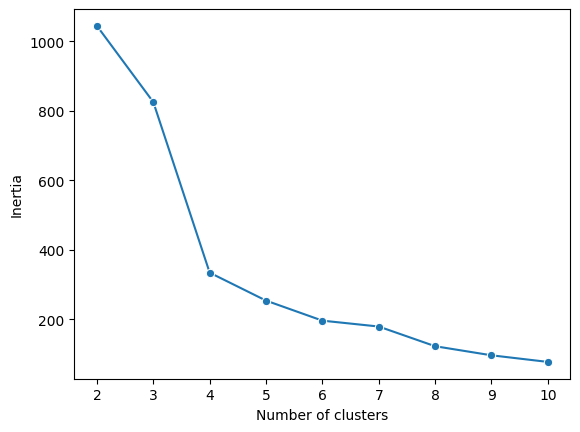

In [17]:
#We want to plot the intertia curve
plot = sns.lineplot(x=num_clusters, y=inertia, marker = 'o')
plot.set_xlabel("Number of clusters");
plot.set_ylabel("Inertia");

Wow!, The elbow of the intertia curves is around 3 cluster centres

***We want to use the Silhouette Score hyperparater to verfiy the the cluster centres. We do so by creating a function to calculate the silhouette scores***

In [18]:
# We write a function to return a list of each k-value's score.
def kmeans_sil(num_clusters, x_vals):
    """
    Accepts as arguments list of ints and data array.
    Fits a KMeans model where k = each value in the list of ints.
    Calculates a silhouette score for each k value.
    Returns each k-value's silhouette score appended to a list.
    """
    sil_score = []
    for num in num_clusters:
        kms = KMeans(n_clusters=num, init='k-means++', n_init='auto', max_iter=1000, tol=0.0001, algorithm='elkan', random_state=42)
        kms.fit(x_vals)
        sil_score.append(silhouette_score(x_vals, kms.labels_))

    return sil_score


sil_score = kmeans_sil(num_clusters, X_scaled)
sil_score

[0.5704501542905761,
 0.4074282719264482,
 0.444700573232154,
 0.4659501299056091,
 0.4177415254016633,
 0.35688520177743355,
 0.4239705260248217,
 0.4310438897635206,
 0.41364292184051543]

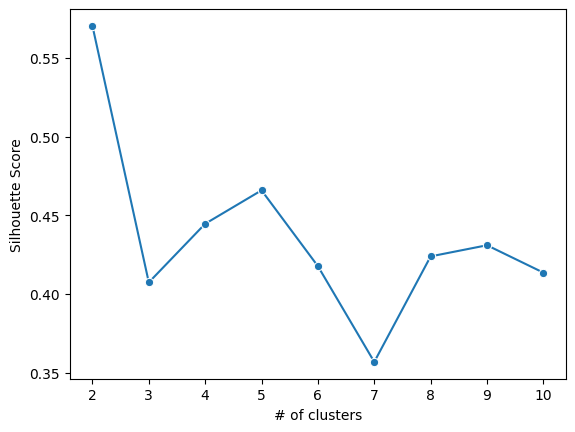

In [19]:
# Create a line plot for the silhouette score.


plot = sns.lineplot(x=num_clusters, y=sil_score, marker = 'o')
plot.set_xlabel("# of clusters");
plot.set_ylabel("Silhouette Score");

Congratulatings to us. We find that the optimal value of the Silhoutte score is 3. So we have 3 cluster centres

*** We now create the model with 3 cluster centres, and fit it to our X_scaled data***

In [26]:
# Fit a 3-cluster model.

model3 = KMeans(n_clusters=4, init='k-means++', n_init='auto', max_iter=1000, tol=0.0001, algorithm='elkan', random_state=42)
model3.fit(X_scaled)

KMeans(algorithm='elkan', max_iter=1000, n_clusters=4, n_init='auto',
       random_state=42)

In [27]:
#We can now print the unique labels
print("Unique labels: ", np.unique(model3.labels_))

Unique labels:  [0 1 2 3]


*** Now, Lets add a new column called clusters to our derivative reflectanceand get the sizes of each cluster***

In [28]:

visible_Transpose['cluster'] = model3.labels_

In [29]:
 #We want to verify the size of the cluster`.

visible_Transpose.groupby(by = ['cluster']).size()

cluster
0    15
1    23
2    23
3     1
dtype: int64

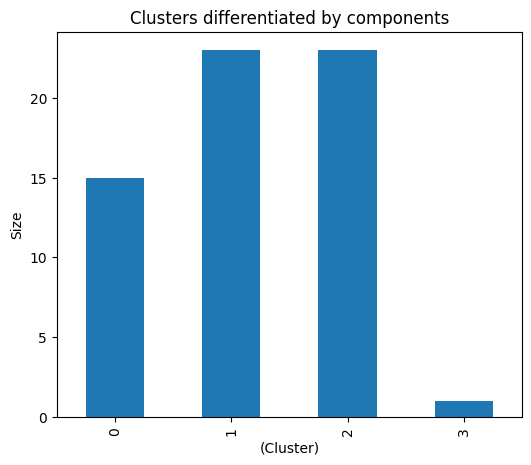

In [30]:
#We want to plot the sizes of the cluster centers
visible_Transpose.groupby(by=['cluster']).size().plot.bar(title='Clusters differentiated by components',
                                                                   figsize=(6, 5),
                                                                   ylabel='Size',
                                                                   xlabel='(Cluster)');

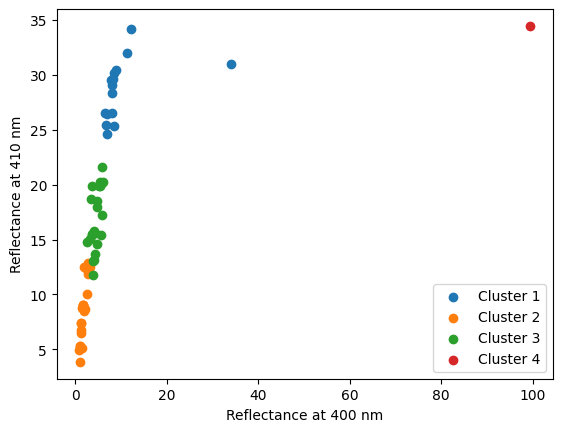

In [32]:
for i in np.unique(model3.labels_):
  plt.scatter(visible_Transpose[visible_Transpose['cluster'] == i]['ten_nm400' ],visible_Transpose[visible_Transpose['cluster'] == i]['ten_nm700' ] )
  #plt.scatter(components['cluster' == i, 1], components['cluster' == i, 2], cluster = i) # idf[label == i , 0] , df[label == i , 1] , label = i)
plt.xlabel('Reflectance at 400 nm')
plt.ylabel('Reflectance at 410 nm')
plt.legend(labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5' ])
plt.show()

In [ ]:
Cluster_1 = visible_Transpose[visible_Transpose['cluster']==0]

In [ ]:
Cluster_1

Wavelength,ten_nm400,ten_nm410,ten_nm420,ten_nm430,ten_nm440,ten_nm450,ten_nm460,ten_nm470,ten_nm480,ten_nm490,...,ten_nm670,ten_nm680,ten_nm690,ten_nm700,ten_nm710,ten_nm720,ten_nm730,ten_nm740,ten_nm750,cluster
ZachA_11_Soil_ten_nm,34.079975,33.081455,31.955781,31.039070,30.569619,30.355420,30.081209,29.961730,29.959762,29.986911,...,31.986333,32.097118,31.905895,31.000504,30.443564,30.248206,30.449728,30.849284,31.233299,0
LynnW_04_CornRes_ten_nm,7.945852,8.591969,9.397239,10.265524,11.114409,11.854127,12.501016,13.138205,13.777041,14.435485,...,24.669392,25.242718,25.952730,26.548644,27.011900,27.789519,28.190033,28.460110,28.915587,0
LynnW_01_CornRes_ten_nm,11.280585,12.002916,12.922290,13.913906,14.893578,15.710747,16.440721,17.155273,17.892802,18.717102,...,29.991001,30.552017,31.370529,32.021946,32.634985,33.450783,33.966027,34.383668,34.913089,0
LynnW_01_Soil_ten_nm,8.500693,8.999734,9.635363,10.383121,11.178984,11.766470,12.155893,12.508091,12.950051,13.579695,...,22.873597,23.248744,24.339558,25.391723,26.108242,26.801763,27.310465,27.750421,28.223389,0
KB_5_Corn_Res_ten_nm,6.458641,7.161020,8.027064,8.940801,9.789619,10.551594,11.262624,11.948343,12.601475,13.261067,...,24.737752,25.311299,25.903371,26.493008,27.070811,27.554777,28.057375,28.535833,28.960595,0
KB_3_Corn_Res_ten_nm,6.602899,7.225584,7.971079,8.753378,9.479603,10.145031,10.783705,11.412636,12.020195,12.640084,...,23.689066,24.290255,24.914792,25.486380,26.075258,26.598197,27.140002,27.670557,28.158394,0
KB_1_Corn_Res_ten_nm,6.922661,7.580205,8.376574,9.201576,9.968068,10.673460,11.334249,11.982418,12.606466,13.237014,...,24.571801,25.178200,25.849076,26.478683,27.142936,27.667532,28.279070,28.896576,29.407681,0
JB_4_Soil_ten_nm,6.838364,7.394280,8.027147,8.805421,9.687161,10.397992,10.811836,11.148297,11.578797,12.227584,...,22.732891,22.959712,23.696588,24.615884,25.317271,25.930926,26.457346,26.868154,27.206061,0
JB_2_Soil_ten_nm,8.255340,8.916744,9.688241,10.648918,11.712780,12.548079,13.054219,13.468847,13.990968,14.782205,...,27.883783,28.290067,28.922210,29.673285,30.404103,31.070619,31.667648,32.194927,32.605002,0
JB_2_Corn_Res_ten_nm,7.928396,8.588443,9.374177,10.323945,11.353565,12.178177,12.716545,13.174597,13.715596,14.489350,...,27.183219,27.615629,28.257108,29.046224,29.817964,30.606681,31.231206,31.726343,32.136099,0


In [ ]:
Cluster_2 = visible_Transpose[visible_Transpose['cluster']==1]

In [ ]:
Cluster_2

Wavelength,ten_nm400,ten_nm410,ten_nm420,ten_nm430,ten_nm440,ten_nm450,ten_nm460,ten_nm470,ten_nm480,ten_nm490,...,ten_nm670,ten_nm680,ten_nm690,ten_nm700,ten_nm710,ten_nm720,ten_nm730,ten_nm740,ten_nm750,cluster
LynnW_03_Soil_ten_nm,3.842220,4.042607,4.297810,4.617973,4.960891,5.203690,5.323738,5.430350,5.596301,5.868581,...,10.829541,11.091666,11.437041,11.763036,12.061052,12.285877,12.566760,12.851866,13.110942,1
SK_1_Soil_ten_nm,1.759681,1.873724,2.026945,2.188887,2.356879,2.525598,2.662253,2.800763,2.957654,3.138860,...,7.198111,7.487593,8.168083,9.066675,9.880475,11.012031,11.800510,12.303562,12.836754,1
KB_5_Drying_Wheat_ten_nm,1.610884,1.833129,2.137676,2.429349,2.671757,2.872129,3.032754,3.183262,3.307855,3.445742,...,5.624016,5.705743,6.886062,9.011420,10.563113,11.514096,12.304082,12.923205,13.289083,1
KB_4_Soil_ten_nm,2.149820,2.308118,2.512593,2.763171,2.991439,3.208368,3.338465,3.494077,3.657230,3.866845,...,8.014185,8.223855,8.464581,8.649361,8.871117,9.012691,9.191819,9.384974,9.558352,1
JB_4_Corn_Res_ten_nm,0.991845,1.086384,1.186115,1.268319,1.398820,1.546357,1.622673,1.702393,1.791447,1.899441,...,3.596793,3.659663,3.743679,3.857090,3.963385,4.033437,4.154795,4.257768,4.337308,1
JB_3_Soil_ten_nm,1.344551,1.441987,1.568334,1.696164,1.882493,2.072895,2.155765,2.238377,2.343465,2.491317,...,4.797466,4.866916,4.970091,5.100268,5.222497,5.341181,5.449763,5.532303,5.610440,1


In [ ]:
Cluster_3 = visible_Transpose[visible_Transpose['cluster']==2]
Cluster_3

Wavelength,ten_nm400,ten_nm410,ten_nm420,ten_nm430,ten_nm440,ten_nm450,ten_nm460,ten_nm470,ten_nm480,ten_nm490,...,ten_nm670,ten_nm680,ten_nm690,ten_nm700,ten_nm710,ten_nm720,ten_nm730,ten_nm740,ten_nm750,cluster
ZachA_15_Weeds_ten_nm,3.087532,3.479493,4.073823,4.689827,5.139534,5.423132,5.570990,5.667451,5.773780,5.941665,...,8.188837,8.282220,9.142645,12.484041,16.909942,21.120378,26.444299,31.351933,33.983336,2
ZachA_14_Weeds_ten_nm,2.438056,2.758994,3.271231,3.746829,4.067394,4.246417,4.341160,4.421982,4.511677,4.662811,...,7.197509,7.295026,7.936827,10.008364,12.523145,14.865465,17.316906,19.253181,20.292734,2
ZachA_13_Weeds_ten_nm,2.698619,2.998660,3.437047,3.882598,4.241225,4.483726,4.611083,4.698481,4.814138,4.994251,...,7.511513,7.618967,8.594839,11.825537,15.790265,19.645391,24.000655,27.795219,29.900871,2
ZachA_12_Wheat_ten_nm,1.251960,1.412299,1.685153,1.980172,2.187072,2.327435,2.418197,2.480833,2.536012,2.610252,...,3.442087,3.511192,4.362044,7.364234,11.695550,17.133127,24.297119,31.484125,36.350863,2
ZachA_12_Road_ten_nm,1.826617,2.177956,2.818411,3.317129,3.551193,3.615691,3.624466,3.652638,3.663940,3.711061,...,4.582772,4.664230,5.499531,8.475345,12.757073,18.068352,25.120087,32.216364,37.008364,2
SK_5_Soil_ten_nm,2.298393,2.507036,2.770927,3.036782,3.272526,3.498242,3.685321,3.853039,4.039214,4.259811,...,8.745186,9.033617,10.110696,12.418197,15.067033,18.316426,21.667409,24.555807,26.608682,2
SK_5_Grass_ten_nm,1.117389,1.252436,1.469583,1.670785,1.786707,1.878509,1.935417,1.958209,1.984170,2.026335,...,2.112982,2.144511,3.060245,6.449346,11.257078,17.207970,24.507632,31.333677,35.747224,2
SK_4_Grass_ten_nm,1.472803,1.651259,1.936383,2.203741,2.375187,2.516267,2.605300,2.650032,2.698349,2.770146,...,3.276344,3.336595,4.544012,8.725712,14.276273,20.816074,28.169474,34.584921,38.656946,2
SK_3_Grass_ten_nm,1.231729,1.372372,1.623581,1.860090,2.022375,2.148151,2.212572,2.239964,2.267355,2.307119,...,2.457578,2.491913,3.438424,6.772703,11.168866,16.280804,22.193769,27.419756,30.636562,2
SK_2_Soil_ten_nm,2.233352,2.454717,2.721493,2.963648,3.170506,3.397444,3.584529,3.737429,3.912571,4.129581,...,8.085825,8.366660,9.684744,12.425733,15.062117,17.877614,20.103178,21.605288,22.706854,2
